# Register your newberry.edu account on https://www.kaggle.com 
#### Complete Python Tutorial for a 2 percent* bump in your final grade https://www.kaggle.com/learn/python
#### Complete Pandas Course for 2 percent* bump in your final grade https://www.kaggle.com/learn/pandas
#### Complete Time Series Course for 4 percent*  bump in your final grade https://www.kaggle.com/ryanholbrook/linear-regression-with-time-series

*You may need to demonstrate competancy to get the full credit 

# Run the following code by clicking on a cell and then pressing 'ctrl'+'Enter' 

Read each of the comments to understand what each line of code does

In [64]:
import pandas as pd  #pandas is good for data manipulation.  I rename it here as "pd" to make it easier to call in the script below.  I could rename it anything I want but "pd" is standard
import matplotlib.pyplot as plt #matplotlib is a good package for graphing.  Again, I rename it plt to make coding more simple


import numpy as np #numpy is a good package for doing calculations
from sklearn.linear_model import LinearRegression  #sklearn is a package that is good at estimation.  Tons of models are available and here I import LinearRegression because that's all I need

pd.set_option('display.max_rows', None) # This is just configuring how pandas displays results.  Without this line of code then pandas would only display a partial set of the output when the output is long.  I want to see it all.

#Import a csv file from a target url:  What is a csv file?  Go to the url below to see the raw data.  columns are separated by a "," and the last column lacks a ","
data_url='https://raw.githubusercontent.com/mknomics/soda/main/soda.csv' # I define a string variable using apostrophe ' but I could ahve also used quotes " ".  I just cannot mix apostophe and quotes in the same line

df = pd.read_csv(data_url) # This line creates a pandas DataFrame that I defined as "df".  I could have called it anything I want






In [65]:
df.dtypes

id             int64
date          object
city          object
lat          float64
long         float64
pop            int64
shop          object
brand         object
container     object
capacity      object
price        float64
quantity       int64
dtype: object

# What do these data types mean?  https://www.Google.com search will be your best friend.  What would you search?  Well, we are in Pandas and the method was dtypes so how about "Pandas dtypes"

In [66]:
# Set my date objects.  This must be done so that 'date' is recognized as a date and not just a random string variable
df['date']=pd.to_datetime(df['date']) #make date a datetime object
df['year']=pd.DatetimeIndex(df['date']).year # I define a variable 'year' using the DatetimeIndex method
df['month']=pd.DatetimeIndex(df['date']).month # similarly I repeat and define 'month'


In [67]:
# Now what are the data types of each variable?
df.dtypes

id                    int64
date         datetime64[ns]
city                 object
lat                 float64
long                float64
pop                   int64
shop                 object
brand                object
container            object
capacity             object
price               float64
quantity              int64
year                  int64
month                 int64
dtype: object

# Try running each of these lines separately 

Timedelta('2526 days 00:00:00')

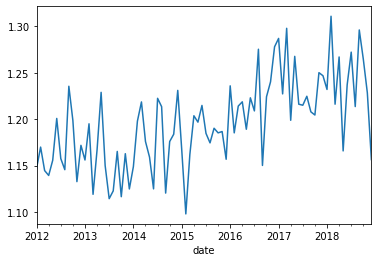

In [60]:
df
df.head()
df['price'] # call a single column
df[['price','quantity']] # call multiple columns; use double brackets
df.describe() # Summary Statistics
df.describe().transpose() # transpose flips results
df.groupby(['brand','capacity'])['price'].describe()
df.groupby(['date'])['price'].mean().plot()  #interpret this line of code
df.groupby(['brand','capacity'])['price'].mean() # what does this line of code do? 
df['date'].max()-df['date'].min()  #what does this line of code tell me?

# Task for you to do
### 1) create a new code block below this text block
### 2) modify the code in the previous block to answer the following questions

### What is the average price of all Kinder-Cola products?

### Is there seasonal variation in total quantity of all soda? (hint: plot it and see)

### What is the maximum price for each brand (hint: use .max() method)


# Call your data based on a condition using "loc" method
#### Conditions are { and = & ; or = |  ; not = != and equal = "=="} YES I TYPED TWO EQUAL SIGNS IN THE LAST CONDITION

#### Syntax for single condition is: "df[(condition 1)]" 
#### Syntax for multiple conditions are: "df[(condition 1) logical operator (condition 2)]" 

In [70]:
df[(df['brand']=='adult-cola')]
# now we can do some stuff with a particular slice if we want.  In the line below we just calculate the mean
df[(df['brand']=='adult-cola')].mean()

# what if I want to list adult-cola in Athens?  Now I need 2 conditions that are paird by the "and" logical operator.  adult-cola AND Athens
df[(df['brand']=='adult-cola') & (df['city']=='Athens')].head() # I finished with the head() method so I don't have to see all output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,year,month
0,1222,2013-02-28,Athens,37.96245,23.68708,671022,shop_3,adult-cola,plastic,1.5lt,2.46,10709,2013,2
1,1256,2013-02-28,Athens,37.97945,23.71622,671022,shop_1,adult-cola,plastic,1.5lt,1.91,12703,2013,2
2,2325,2014-02-28,Athens,37.97945,23.71622,668203,shop_1,adult-cola,plastic,1.5lt,3.99,3642,2014,2
3,2333,2014-02-28,Athens,37.96245,23.68708,668203,shop_3,adult-cola,plastic,1.5lt,2.82,9282,2014,2
4,3334,2015-02-28,Athens,37.97945,23.71622,667237,shop_1,adult-cola,plastic,1.5lt,1.29,15782,2015,2


# Demand Estimation:  We want to find a pure relationship between price and quantity, one that is not statistically influenced by other factors, but it turns out it is hard to get that pure relationship  
### Naive approach to Demand Estimation 
#### Aggregate data for a single product, in a single metropolitan market, and then consider a single year of data points
### Big question: In this set-up, what other factors are influncing quantity besides price changes? 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


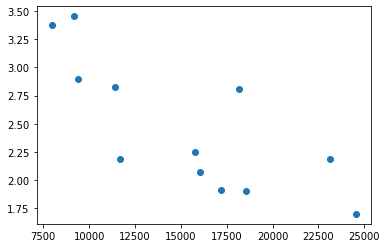

In [26]:
# Let's go with the approach anyway

df2=df.groupby(['brand','container','city','date'])['price','quantity', 'year','month'].mean().reset_index() # Ignoring "reset_index() method, what else did this do?  Did I do it right?


df2.loc[(df2['container']=='plastic') & (df2['city']=='Athens') & (df2['brand']=='adult-cola')].pivot(index='date', columns=['city','brand','container'], values=['price','quantity'])

df2.pivot(index='date', columns=['city','brand','container'], values=['price','quantity'])
cola = df2.loc[(df2['container']=='plastic') & (df2['brand']=='adult-cola')&(df2['city']=='Athens') & (df2['year']==2013) ]
plt.scatter(cola['quantity'],cola['price'])
plt.show()



# Linear Regression Methods

## What is the best fit line that can possibly be made given the data?  

# $Y = \beta_x X + \beta_0 + \epsilon$
## Think $Y=mX+b$ where $m=\beta_x$ and $b=\beta_0$ and $\epsilon$ is an error term

## If the data is given then a line is defined by the coefficients $\beta_x , \beta_0$

### Find the "best" values of $\beta_x , \beta_0$.  where "best" minimizes statistical error $\epsilon$

How can we sum up all errors?  Some are positive and some are negative?  Solution: define the error as the squared error loss $$\sum\epsilon^2$$ 

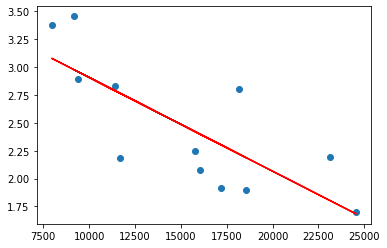

In [27]:
X = cola['quantity'].values.reshape(-1,1) #convert to numpy array using "values"
Y = cola['price'].values.reshape(-1,1)
linear_regression = LinearRegression() # Create a linear_regression object
linear_regression.fit(X , Y)  # Fit the model
Y_pred = linear_regression.predict(X)  # Fits the Data Points "X" with the parameters from the Fit step to form a prediction

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# Below are some data cleaning tasks that need to be done before running any model.  Cleaning data is a big challenge that I am breezing over here. 

In [ ]:
# Check missing values
#df['container'].cat.add_categories('No Record', inplace=True)
pd.crosstab(df['capacity'].fillna('No Record'),df['container'].fillna('No Record'))

# Notice all plastic are 1.5lt, all glass are 500ml and all can are 330ml.
df.loc[df.capacity=='500ml','container']='glass'
df.loc[df.capacity=='330ml','container']='can'
df.loc[df.capacity=='1.5lt','container']='plastic'

df.loc[df.capacity=='glass','container']='500ml'
df.loc[df.capacity=='can','container']='330ml'
df.loc[df.capacity=='plastic','container']='1.5lt'

# there are some empty rows
df.dropna(axis=0, inplace=True)

pd.crosstab(df['container'].fillna('No Record'), df['capacity'].fillna('No Record'))
df.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,1222,2013-02-28,Athens,37.96245,23.68708,671022,shop_3,adult-cola,plastic,1.5lt,2.46,10709
1,1256,2013-02-28,Athens,37.97945,23.71622,671022,shop_1,adult-cola,plastic,1.5lt,1.91,12703
2,2325,2014-02-28,Athens,37.97945,23.71622,668203,shop_1,adult-cola,plastic,1.5lt,3.99,3642
3,2333,2014-02-28,Athens,37.96245,23.68708,668203,shop_3,adult-cola,plastic,1.5lt,2.82,9282
4,3334,2015-02-28,Athens,37.97945,23.71622,667237,shop_1,adult-cola,plastic,1.5lt,1.29,15782
